In [48]:
import pandas as pd
import numpy as np
import seaborn as sns                                                                                                       
from matplotlib import pyplot as plt
import time

In [49]:
gloabl_start_time = time.time()
customer_data = pd.read_excel('../data/credit scoring dataset v2/credit_scoring_v2.xlsx')
pd.options.display.max_columns = None
customer_data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS0xd40,July,23,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Persol Loan, a...",3,8.00,2027-11-01 00:00:00,4.00,Good,809.98,22.54,22 Years and 7 Months,No,49.57,178.34,LowspentSmallvaluepayments,244.57,Good
1,CUS0x21b1,February,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,7,1.00,1942-07-01 00:00:00,2.00,Good,605.03,38.55,26 Years and 8 Months,No,18.82,40.39,HighspentLargevaluepayments,484.59,Good
2,CUS0x21b1,May,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,1.00,1942-06-01 00:00:00,2.00,Good,605.03,34.98,26 Years and 11 Months,No,18.82,130.12,LowspentSmallvaluepayments,444.87,Good
3,CUS0x21b1,June,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,0.00,1942-05-01 00:00:00,2.00,Good,605.03,33.38,27 Years and 0 Months,No,18.82,43.48,HighspentLargevaluepayments,481.51,Good
4,CUS0x21b1,August,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,4.00,1942-05-01 00:00:00,2.00,Good,605.03,32.93,27 Years and 2 Months,No,18.82,218.90,LowspentSmallvaluepayments,356.08,Good


### We have 39 712 records and 25 columns

In [50]:
customer_data.shape

(39712, 25)

Data is inbalanced, around 13 % of data refer to the non-default case (0), other refer to default case (1)

In [51]:
from sklearn.model_selection import train_test_split
# customer_data, _ = train_test_split(customer_data, train_size=0.5, stratify=customer_data['target'], random_state=68)
customer_data['Credit_Score'].value_counts()

Credit_Score
Standard    20956
Poor        12338
Good         6418
Name: count, dtype: int64

### Dropping rows with NaN values

In [52]:
customer_data.isna().sum()

Customer_ID                  0
Month                        0
Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Type_of_Loan                25
Delay_from_due_date          0
Num_of_Delayed_Payment       1
Changed_Credit_Limit         1
Num_Credit_Inquiries         0
Credit_Mix                   3
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Credit_History_Age           0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
dtype: int64

In [53]:
customer_data = customer_data.dropna().reset_index(drop=True)
customer_data.shape

(39685, 25)

In [54]:
customer_data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS0xd40,July,23,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Persol Loan, a...",3,8.00,2027-11-01 00:00:00,4.00,Good,809.98,22.54,22 Years and 7 Months,No,49.57,178.34,LowspentSmallvaluepayments,244.57,Good
1,CUS0x21b1,February,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,7,1.00,1942-07-01 00:00:00,2.00,Good,605.03,38.55,26 Years and 8 Months,No,18.82,40.39,HighspentLargevaluepayments,484.59,Good
2,CUS0x21b1,May,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,1.00,1942-06-01 00:00:00,2.00,Good,605.03,34.98,26 Years and 11 Months,No,18.82,130.12,LowspentSmallvaluepayments,444.87,Good
3,CUS0x21b1,June,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,0.00,1942-05-01 00:00:00,2.00,Good,605.03,33.38,27 Years and 0 Months,No,18.82,43.48,HighspentLargevaluepayments,481.51,Good
4,CUS0x21b1,August,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,4.00,1942-05-01 00:00:00,2.00,Good,605.03,32.93,27 Years and 2 Months,No,18.82,218.90,LowspentSmallvaluepayments,356.08,Good


In [55]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39685 entries, 0 to 39684
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               39685 non-null  object 
 1   Month                     39685 non-null  object 
 2   Age                       39685 non-null  int64  
 3   Occupation                39685 non-null  object 
 4   Annual_Income             39685 non-null  float64
 5   Monthly_Inhand_Salary     39685 non-null  float64
 6   Num_Bank_Accounts         39685 non-null  int64  
 7   Num_Credit_Card           39685 non-null  int64  
 8   Interest_Rate             39685 non-null  int64  
 9   Num_of_Loan               39685 non-null  int64  
 10  Type_of_Loan              39685 non-null  object 
 11  Delay_from_due_date       39685 non-null  int64  
 12  Num_of_Delayed_Payment    39685 non-null  float64
 13  Changed_Credit_Limit      39685 non-null  object 
 14  Num_Cr

In [56]:
customer_data.shape

(39685, 25)

In [57]:
def extract_credit_history(value):
    value = value.replace(" ", "").replace("Years", "").replace("Months", "")
    years, months = value.split("and")
    years, months = int(years), int(months)
    return round(years + months/12, 2)

customer_data['Credit_History_Age'] = customer_data['Credit_History_Age'].apply(extract_credit_history)
customer_data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS0xd40,July,23,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Persol Loan, a...",3,8.00,2027-11-01 00:00:00,4.00,Good,809.98,22.54,22.58,No,49.57,178.34,LowspentSmallvaluepayments,244.57,Good
1,CUS0x21b1,February,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,7,1.00,1942-07-01 00:00:00,2.00,Good,605.03,38.55,26.67,No,18.82,40.39,HighspentLargevaluepayments,484.59,Good
2,CUS0x21b1,May,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,1.00,1942-06-01 00:00:00,2.00,Good,605.03,34.98,26.92,No,18.82,130.12,LowspentSmallvaluepayments,444.87,Good
3,CUS0x21b1,June,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,0.00,1942-05-01 00:00:00,2.00,Good,605.03,33.38,27.00,No,18.82,43.48,HighspentLargevaluepayments,481.51,Good
4,CUS0x21b1,August,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,4.00,1942-05-01 00:00:00,2.00,Good,605.03,32.93,27.17,No,18.82,218.90,LowspentSmallvaluepayments,356.08,Good


In [58]:
import re
def clean_datetime_data(df, col='Outstanding_Debt'):
    format = r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$'
    mask = df[col].astype(str).str.match(format, na=False)
    df = df[~mask].reset_index(drop=True)
    return df

customer_data = clean_datetime_data(customer_data)
customer_data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS0xd40,July,23,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Persol Loan, a...",3,8.00,2027-11-01 00:00:00,4.00,Good,809.98,22.54,22.58,No,49.57,178.34,LowspentSmallvaluepayments,244.57,Good
1,CUS0x21b1,February,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,7,1.00,1942-07-01 00:00:00,2.00,Good,605.03,38.55,26.67,No,18.82,40.39,HighspentLargevaluepayments,484.59,Good
2,CUS0x21b1,May,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,1.00,1942-06-01 00:00:00,2.00,Good,605.03,34.98,26.92,No,18.82,130.12,LowspentSmallvaluepayments,444.87,Good
3,CUS0x21b1,June,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,0.00,1942-05-01 00:00:00,2.00,Good,605.03,33.38,27.00,No,18.82,43.48,HighspentLargevaluepayments,481.51,Good
4,CUS0x21b1,August,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,4.00,1942-05-01 00:00:00,2.00,Good,605.03,32.93,27.17,No,18.82,218.90,LowspentSmallvaluepayments,356.08,Good


In [59]:
"""Checking if the datetime values were removed correctly"""
# for elem in customer_data['Outstanding_Debt'].value_counts().index:
#     print(elem)

'Checking if the datetime values were removed correctly'

In [60]:
customer_data = customer_data.astype({'Outstanding_Debt': 'float64'})
"""describe numeric data"""
def numeric_describe(df):
    pd.set_option('display.float_format', '{:.2f}'.format)
    numerical_data = customer_data.select_dtypes(["int32", "float32", "int64", "float64"]).dropna()
    numerical_data_describe = numerical_data.describe()
    numerical_data_describe.loc['unique'] = numerical_data.nunique()
    numerical_data_describe.loc['var_coeff [%]'] = 100.0 * numerical_data_describe.loc['std'] / numerical_data_describe.loc['mean']
    numerical_data_describe.loc['median'] = numerical_data.median()
    numerical_data_describe.loc['skew'] = numerical_data.skew()
    numerical_data_describe.loc['kurtosis'] = numerical_data.kurtosis()
    return numerical_data, numerical_data_describe
numerical_data, numerical_data_describe, = numeric_describe(customer_data)
numerical_data_describe

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00,39473.00
mean,111.32,175987.39,4027.99,16.93,22.68,76.99,3.46,22.03,31.93,26.75,1514.62,32.20,17.76,1396.35,624.68,-33778363269407746031616.00
std,693.92,1437952.72,3100.00,117.13,128.72,481.17,62.89,15.25,229.70,186.45,1189.36,5.05,8.31,8193.58,2044.15,3355383535171094244753408.00
min,-500.00,7005.93,303.65,-1.00,0.00,1.00,-100.00,-5.00,-3.00,0.00,0.23,20.88,0.08,4.46,0.00,-333333333333332971258642432.00
25%,24.00,18763.21,1571.31,4.00,4.00,8.00,2.00,10.00,9.00,3.00,613.91,28.03,11.25,41.10,71.43,264.50
50%,33.00,36080.59,2992.90,6.00,6.00,15.00,3.00,19.00,14.00,6.00,1246.66,32.23,17.58,78.55,130.22,325.10
75%,42.00,70088.36,5734.64,8.00,7.00,22.00,6.00,29.00,19.00,9.00,2140.35,36.38,24.25,169.06,251.54,445.10
max,8682.00,24198062.00,15204.63,1798.00,1499.00,5797.00,1480.00,67.00,4397.00,2594.00,4998.07,49.56,33.67,82331.00,10000.00,1552.95
unique,746.00,11315.00,11405.00,431.00,710.00,821.00,182.00,73.00,347.00,573.00,10723.00,39473.00,404.00,12591.00,37615.00,39470.00
var_coeff [%],623.33,817.08,76.96,691.80,567.56,624.95,1818.64,69.21,719.34,697.05,78.52,15.69,46.78,586.79,327.23,-9933.53


Filtering out suspicious values (Age, Num_Bank_Accounts, Num_of_Loan, Num_of_Delayed_Payment, Monthly Balance)

In [61]:
customer_data = customer_data[customer_data["Monthly_Balance"] != -333333333333332971258642432.00].reset_index(drop=True)
cols_to_clean = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
"""Pre-filtering the columns to clean by removing rows with negative values"""
for col in cols_to_clean:
    customer_data = customer_data[customer_data[col] >= 0].reset_index(drop=True)
"""Cleaning other columns from strange negative values and strange outliers""" 
for col in cols_to_clean:
    if col == 'Age':
        customer_data = customer_data[(customer_data[col] >= 18) & (customer_data[col] <= 100)].reset_index(drop=True)
    else:
        # threshold_values_for_cols = [10, 11, 9, 30]
        val_counts = customer_data[col].value_counts()
        valid_data = val_counts[val_counts.values > 10].index.tolist()
        """We keep only the values that are present more than 10 times in the column"""
        customer_data = customer_data[customer_data[col].isin(valid_data)].reset_index(drop=True)
numerical_data, numerical_data_describe = numeric_describe(customer_data)
numerical_data_describe

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00
mean,34.10,177284.42,4071.65,5.47,5.61,14.93,3.90,21.66,13.58,5.95,1481.48,32.25,18.07,1420.10,617.41,386.08
std,9.97,1451789.15,3125.67,2.58,2.07,8.84,2.20,15.11,6.19,3.91,1183.20,5.06,8.33,8261.47,2024.73,196.94
min,18.00,7006.03,303.65,0.00,1.00,1.00,1.00,-5.00,0.00,0.00,0.23,20.88,0.17,4.46,0.00,0.13
25%,26.00,19006.52,1588.38,4.00,4.00,8.00,2.00,10.00,9.00,3.00,587.16,28.09,11.58,40.84,71.59,265.94
50%,34.00,36379.24,3008.49,6.00,6.00,14.00,4.00,18.00,14.00,6.00,1203.19,32.26,17.92,78.04,130.78,327.99
75%,42.00,70939.34,5810.90,7.00,7.00,20.00,5.00,29.00,18.00,9.00,2077.68,36.43,24.75,167.47,252.91,450.86
max,95.00,24198062.00,15204.63,10.00,11.00,34.00,9.00,67.00,28.00,17.00,4998.07,49.56,33.67,82331.00,10000.00,1552.95
unique,40.00,10413.00,10485.00,11.00,11.00,34.00,9.00,73.00,29.00,18.00,9950.00,31329.00,403.00,11422.00,29889.00,31329.00
var_coeff [%],29.24,818.90,76.77,47.16,36.83,59.24,56.44,69.76,45.60,65.67,79.87,15.69,46.10,581.75,327.94,51.01


In [62]:
# val_counts = customer_data['Num_of_Delayed_Payment'].value_counts().sort_index(ascending=False)
# val_counts[val_counts.index <= 30]

Dropping unnecessary columns

In [63]:
customer_data = customer_data.drop(columns=['Customer_ID', 'Changed_Credit_Limit'])

In [64]:
categorical_data = customer_data.select_dtypes(["object"]).dropna().reset_index(drop=True)
categorical_data.describe()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,31329,31329,31329,31329,31329,31329,31329
unique,8,15,5646,3,3,6,3
top,July,Lawyer,Not Specified,Standard,Yes,LowspentSmallvaluepayments,Standard
freq,3965,2294,528,14358,16977,8601,16577


In [65]:
(numerical_data.columns.size, categorical_data.columns.size)

(16, 7)

In [66]:
"""adjusting number of rows for subplot"""
def subplot_shape(df, subplot_cols=3):
    df_ncols = df.columns.size
    if df_ncols %subplot_cols == 0:
        return (int(df_ncols / subplot_cols), subplot_cols)
    else:
        return (df_ncols // subplot_cols + 1, subplot_cols)

"""function to draw distributions for variables (columns)"""
def draw_distribution(df, subplot_size, distributions_for_numerics=True, subplot_cols=3, barplot_max_cols=20, top_n_freq=5):
    plot_shape = subplot_shape(df, subplot_cols=subplot_cols)
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=subplot_size)
    axes = axes.flatten()
    num_cols = df.shape[1]
    distribution_type = {}
    keys = df.columns.values
    distribution_type = distribution_type.fromkeys(keys)

    for iter, (ax, col) in enumerate(zip(axes, df.columns)):
        top_frequent = ''
        data = df[col].dropna().reset_index(drop=True)
        val_counts = data.value_counts()
        """Plotting distributions for categorical and numerical data"""
        if data.dtype == 'object':
            """Ploting all categories or top 5 if there are too many of them to be well readable"""
            if len(val_counts.index) <= barplot_max_cols / 2:
                sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax, edgecolor='black')
                """For Payment_Behaviour rotate xticks because the category names are quite long"""
                if col == 'Payment_Behaviour':
                    ax.tick_params(axis='x', labelrotation=45)
            else:
                top_frequent = f" - TOP {top_n_freq} categories"
                sns.barplot(x=val_counts.index[0:top_n_freq], y=val_counts.values[0:top_n_freq], ax=ax, edgecolor='black')
            plot_type = 'barplot'
        else:  
            """Plotting distributions for numerical data, if there are not too many unique values, use barplot, otherwise use histogram"""
            if len(val_counts.index) <= barplot_max_cols:
                sns.barplot(x=val_counts.index, y=val_counts.values, ax=ax, edgecolor='black')
                plot_type = 'barplot'
            else:
                sns.histplot(data=data, bins='auto', ax=ax, edgecolor='black')
                plot_type = 'histogram'
        ax.set_title(f"{col}{top_frequent}")
        ax.set_xlabel('')
        ax.set_ylabel('')
        distribution_type[col] = plot_type
        # Counter for drawing charts process
        print(f'\rDrawing distribution plots [{iter+1}/{num_cols}]', end='', flush=True)
    for i, item in enumerate(distribution_type.items()):
        if i == 0:
            print('\n')
        print(item)
    plt.tight_layout()
    plt.show()

Drawing distribution plots [23/23]

('Month', 'barplot')
('Age', 'histogram')
('Occupation', 'barplot')
('Annual_Income', 'histogram')
('Monthly_Inhand_Salary', 'histogram')
('Num_Bank_Accounts', 'barplot')
('Num_Credit_Card', 'barplot')
('Interest_Rate', 'histogram')
('Num_of_Loan', 'barplot')
('Type_of_Loan', 'barplot')
('Delay_from_due_date', 'histogram')
('Num_of_Delayed_Payment', 'histogram')
('Num_Credit_Inquiries', 'barplot')
('Credit_Mix', 'barplot')
('Outstanding_Debt', 'histogram')
('Credit_Utilization_Ratio', 'histogram')
('Credit_History_Age', 'histogram')
('Payment_of_Min_Amount', 'barplot')
('Total_EMI_per_month', 'histogram')
('Amount_invested_monthly', 'histogram')
('Payment_Behaviour', 'barplot')
('Monthly_Balance', 'histogram')
('Credit_Score', 'barplot')


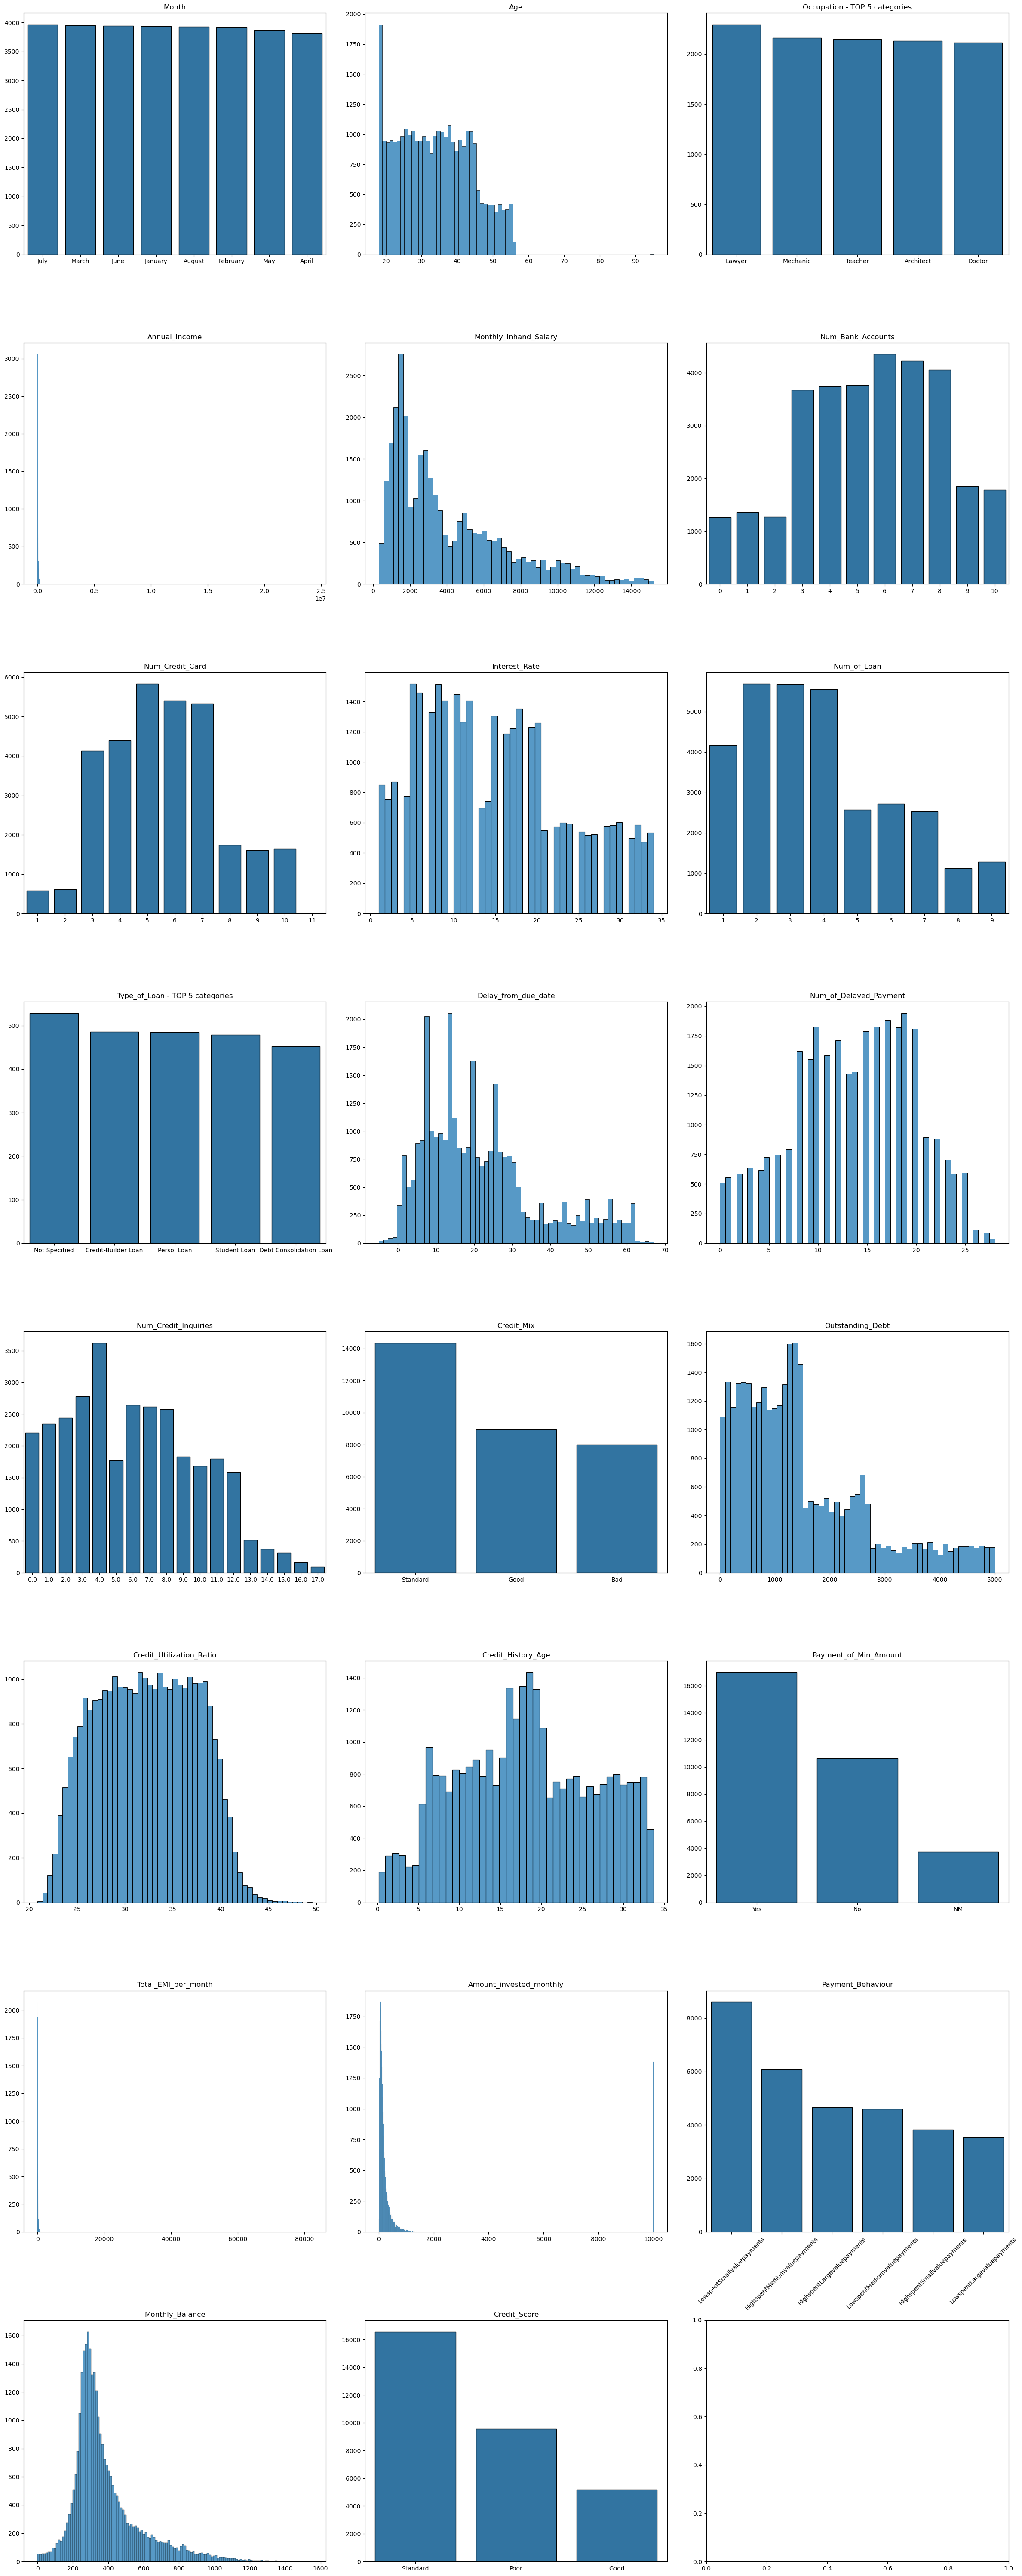

In [67]:
draw_distribution(customer_data, subplot_size=(24, 60), subplot_cols=3)

In [68]:
categorical_data = customer_data.select_dtypes(['object'])
categorical_data.describe()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,31329,31329,31329,31329,31329,31329,31329
unique,8,15,5646,3,3,6,3
top,July,Lawyer,Not Specified,Standard,Yes,LowspentSmallvaluepayments,Standard
freq,3965,2294,528,14358,16977,8601,16577


In [69]:
numerical_data = customer_data.select_dtypes(['int32', 'float32', 'int64', 'float64'])
numerical_data.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.84,3,4,3,4,3,8.00,4.00,809.98,22.54,22.58,49.57,178.34,244.57
1,28,34847.84,3037.99,2,4,6,1,7,1.00,2.00,605.03,38.55,26.67,18.82,40.39,484.59
2,28,34847.84,3037.99,2,4,6,1,3,1.00,2.00,605.03,34.98,26.92,18.82,130.12,444.87
3,28,34847.84,3037.99,2,4,6,1,3,0.00,2.00,605.03,33.38,27.00,18.82,43.48,481.51
4,28,34847.84,3037.99,2,4,6,1,3,4.00,2.00,605.03,32.93,27.17,18.82,218.90,356.08


In [70]:
numerical_data, numerical_data_describe = numeric_describe(customer_data)
numerical_data_describe

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00,31329.00
mean,34.10,177284.42,4071.65,5.47,5.61,14.93,3.90,21.66,13.58,5.95,1481.48,32.25,18.07,1420.10,617.41,386.08
std,9.97,1451789.15,3125.67,2.58,2.07,8.84,2.20,15.11,6.19,3.91,1183.20,5.06,8.33,8261.47,2024.73,196.94
min,18.00,7006.03,303.65,0.00,1.00,1.00,1.00,-5.00,0.00,0.00,0.23,20.88,0.17,4.46,0.00,0.13
25%,26.00,19006.52,1588.38,4.00,4.00,8.00,2.00,10.00,9.00,3.00,587.16,28.09,11.58,40.84,71.59,265.94
50%,34.00,36379.24,3008.49,6.00,6.00,14.00,4.00,18.00,14.00,6.00,1203.19,32.26,17.92,78.04,130.78,327.99
75%,42.00,70939.34,5810.90,7.00,7.00,20.00,5.00,29.00,18.00,9.00,2077.68,36.43,24.75,167.47,252.91,450.86
max,95.00,24198062.00,15204.63,10.00,11.00,34.00,9.00,67.00,28.00,17.00,4998.07,49.56,33.67,82331.00,10000.00,1552.95
unique,40.00,10413.00,10485.00,11.00,11.00,34.00,9.00,73.00,29.00,18.00,9950.00,31329.00,403.00,11422.00,29889.00,31329.00
var_coeff [%],29.24,818.90,76.77,47.16,36.83,59.24,56.44,69.76,45.60,65.67,79.87,15.69,46.10,581.75,327.94,51.01


In [71]:
"""function to determine number of outlier values in a dataframe column"""
def number_of_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

"""function for drawing boxplots"""
def draw_boxplots(df, subplot_size=(16, 10), subplot_cols=3):
    plot_shape = subplot_shape(df, subplot_cols=subplot_cols)
    fig, axes = plt.subplots(plot_shape[0], plot_shape[1], figsize=subplot_size)
    axes = axes.flatten()
    num_cols = df.shape[1]
    num_outliers = []
    
    for iter, (ax, col) in enumerate(zip(axes, df.columns)):
        boxplot = sns.boxplot(data=df[col], ax=ax)
        num_outliers.append( number_of_outliers(df[col]) )
        ax.set_title(col)
        ax.set_ylabel('')
        ax.grid()
        print(f'\rDrawing boxplots [{iter+1}/{num_cols}]', end='', flush=True)
    print(f'\n{num_outliers}')
    plt.tight_layout()
    plt.show()

Drawing boxplots [16/16]
[1, 894, 682, 0, 0, 0, 0, 991, 0, 0, 1315, 1, 0, 2090, 3128, 2325]


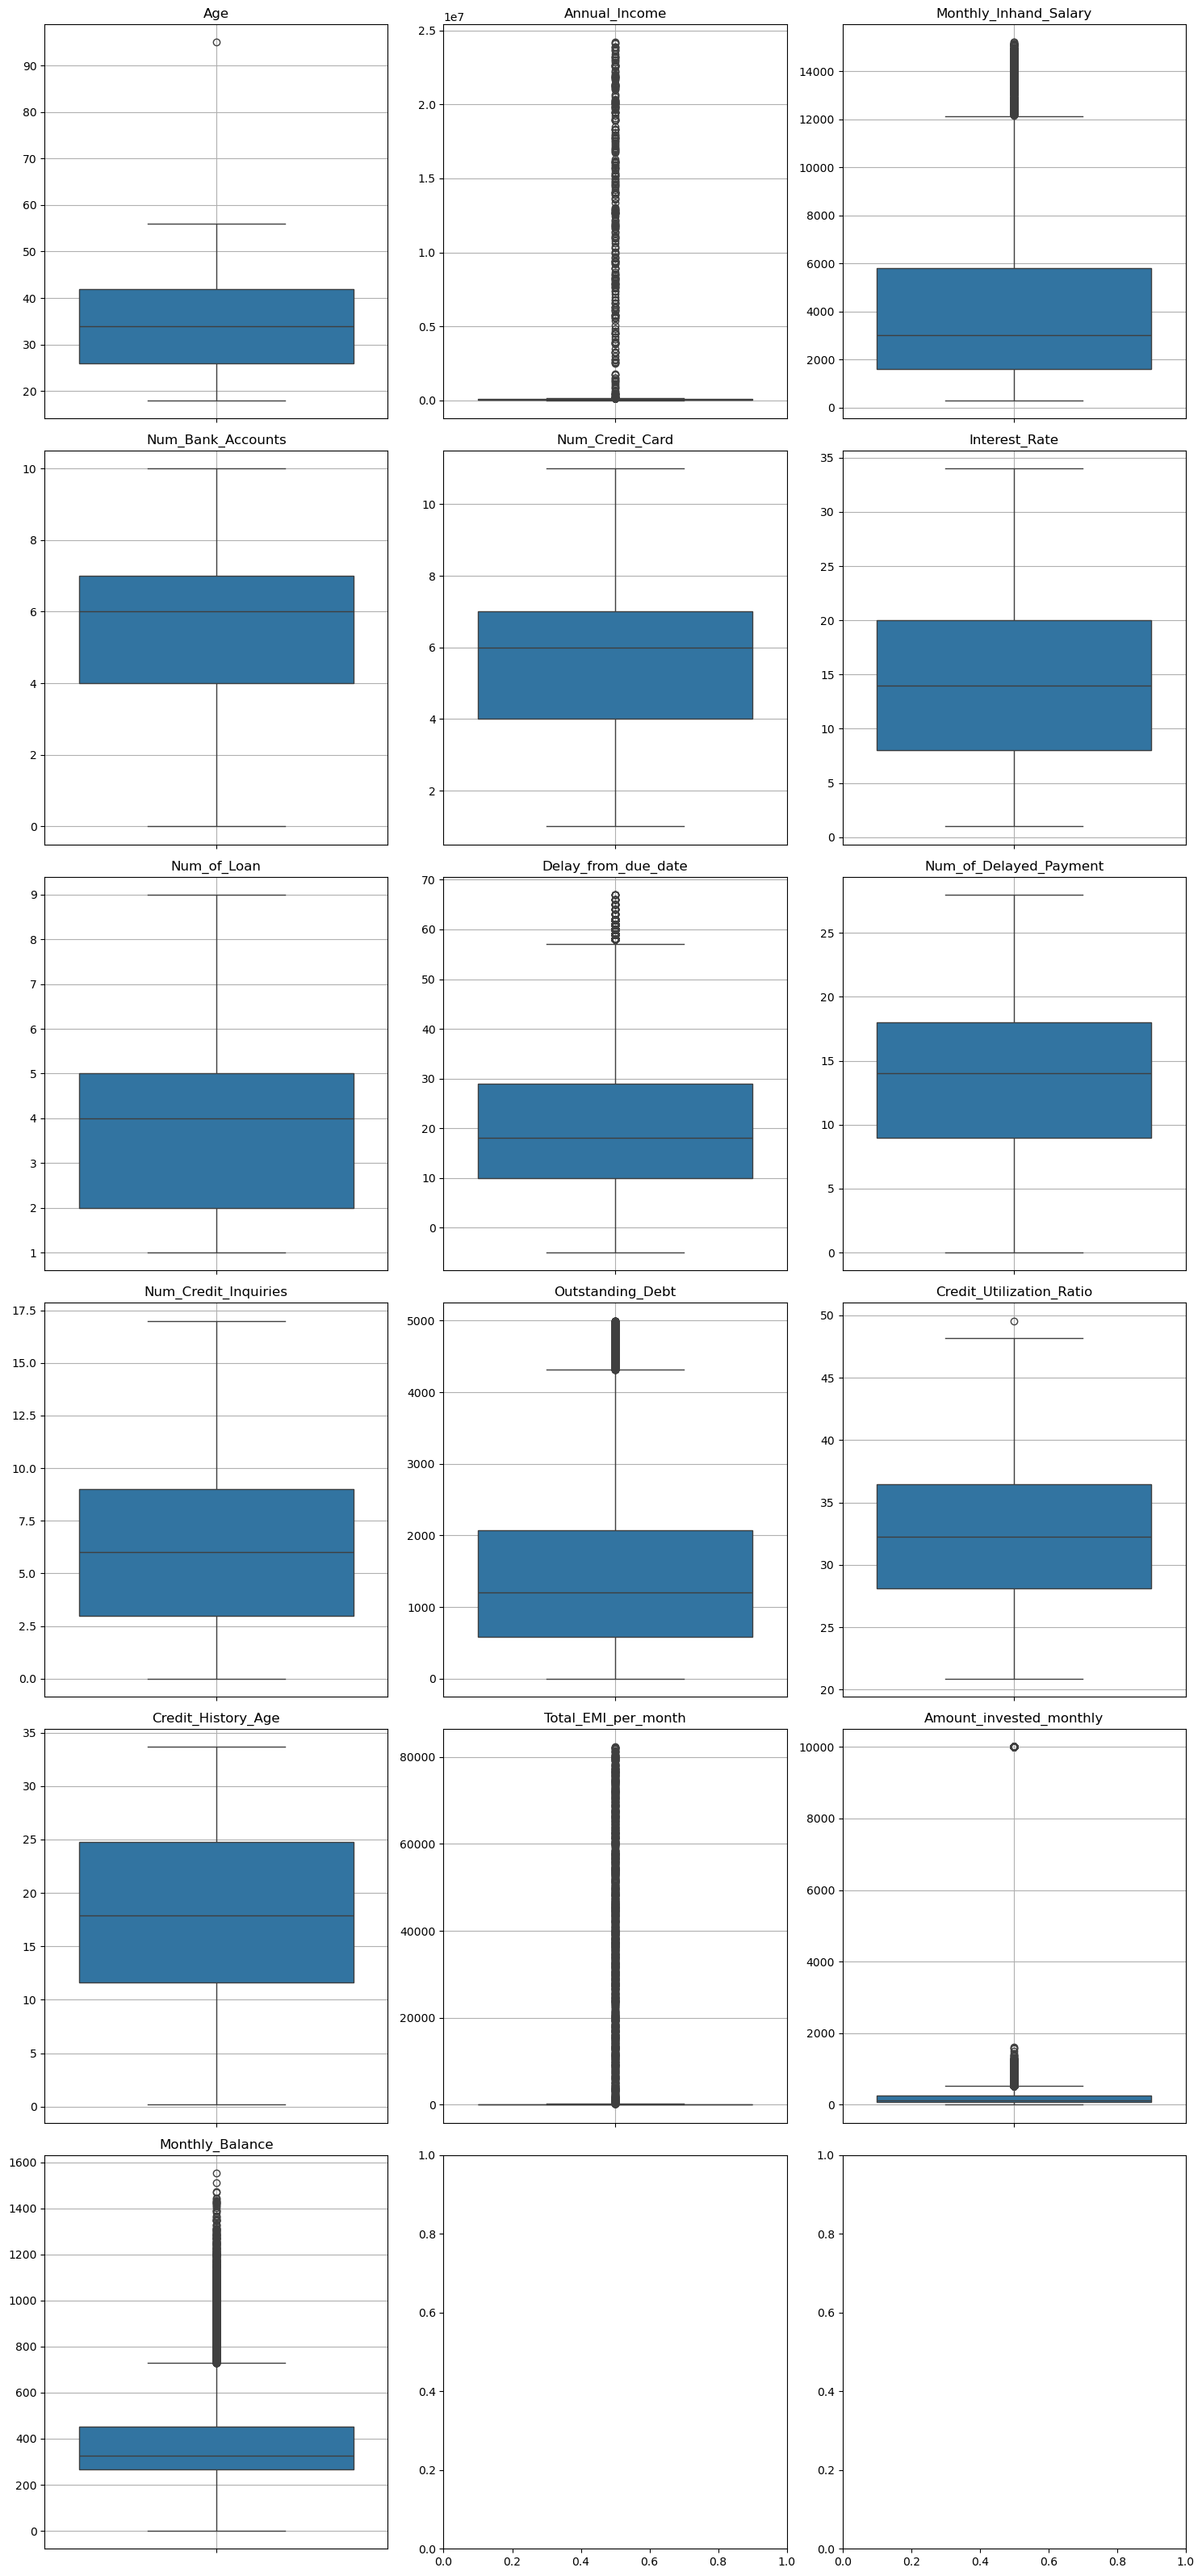

In [72]:
draw_boxplots(numerical_data, subplot_size=(15, 32))

In [73]:
def handle_outliers(df, threshold=1.5, remove=False, replace_val='mean'):
    df_cleaned = df.copy()
    df_numeric = df_cleaned.select_dtypes(include=['int32', 'float32', 'int64', 'float64'])
    
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # data serieses for lower and upper bounds for each numeric column
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    if remove == True:
        # condition for numeric columns for handling outliers
        mask = ~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)
        df_cleaned_no_outliers = df_cleaned[mask]
        print(f"Customer dataframe INPUT size: {len(df_cleaned)}")
        print(f"Deleted rows containing outliers: {len(mask[mask==False])}")
        print(f"Customer dataframe OUTPUT size: {len(df_cleaned_no_outliers)}")
        return df_cleaned_no_outliers

    else:
        for col in df_numeric.columns:
            col_dtype = df_cleaned[col].dtype
            if replace_val == 'mean':
                replacement_val = df_cleaned[col].mean()
            elif replace_val == 'median':
                replacement_val = df_cleaned[col].median()

            replacement = col_dtype.type(replacement_val) # setting type of the replacement value corresponding to given column
            outlier_mask_col = ((df_cleaned[col] < lower_bound[col]) | (df_cleaned[col] > upper_bound[col]))
            df_cleaned.loc[outlier_mask_col, col] = replacement

        return df_cleaned

<Axes: >

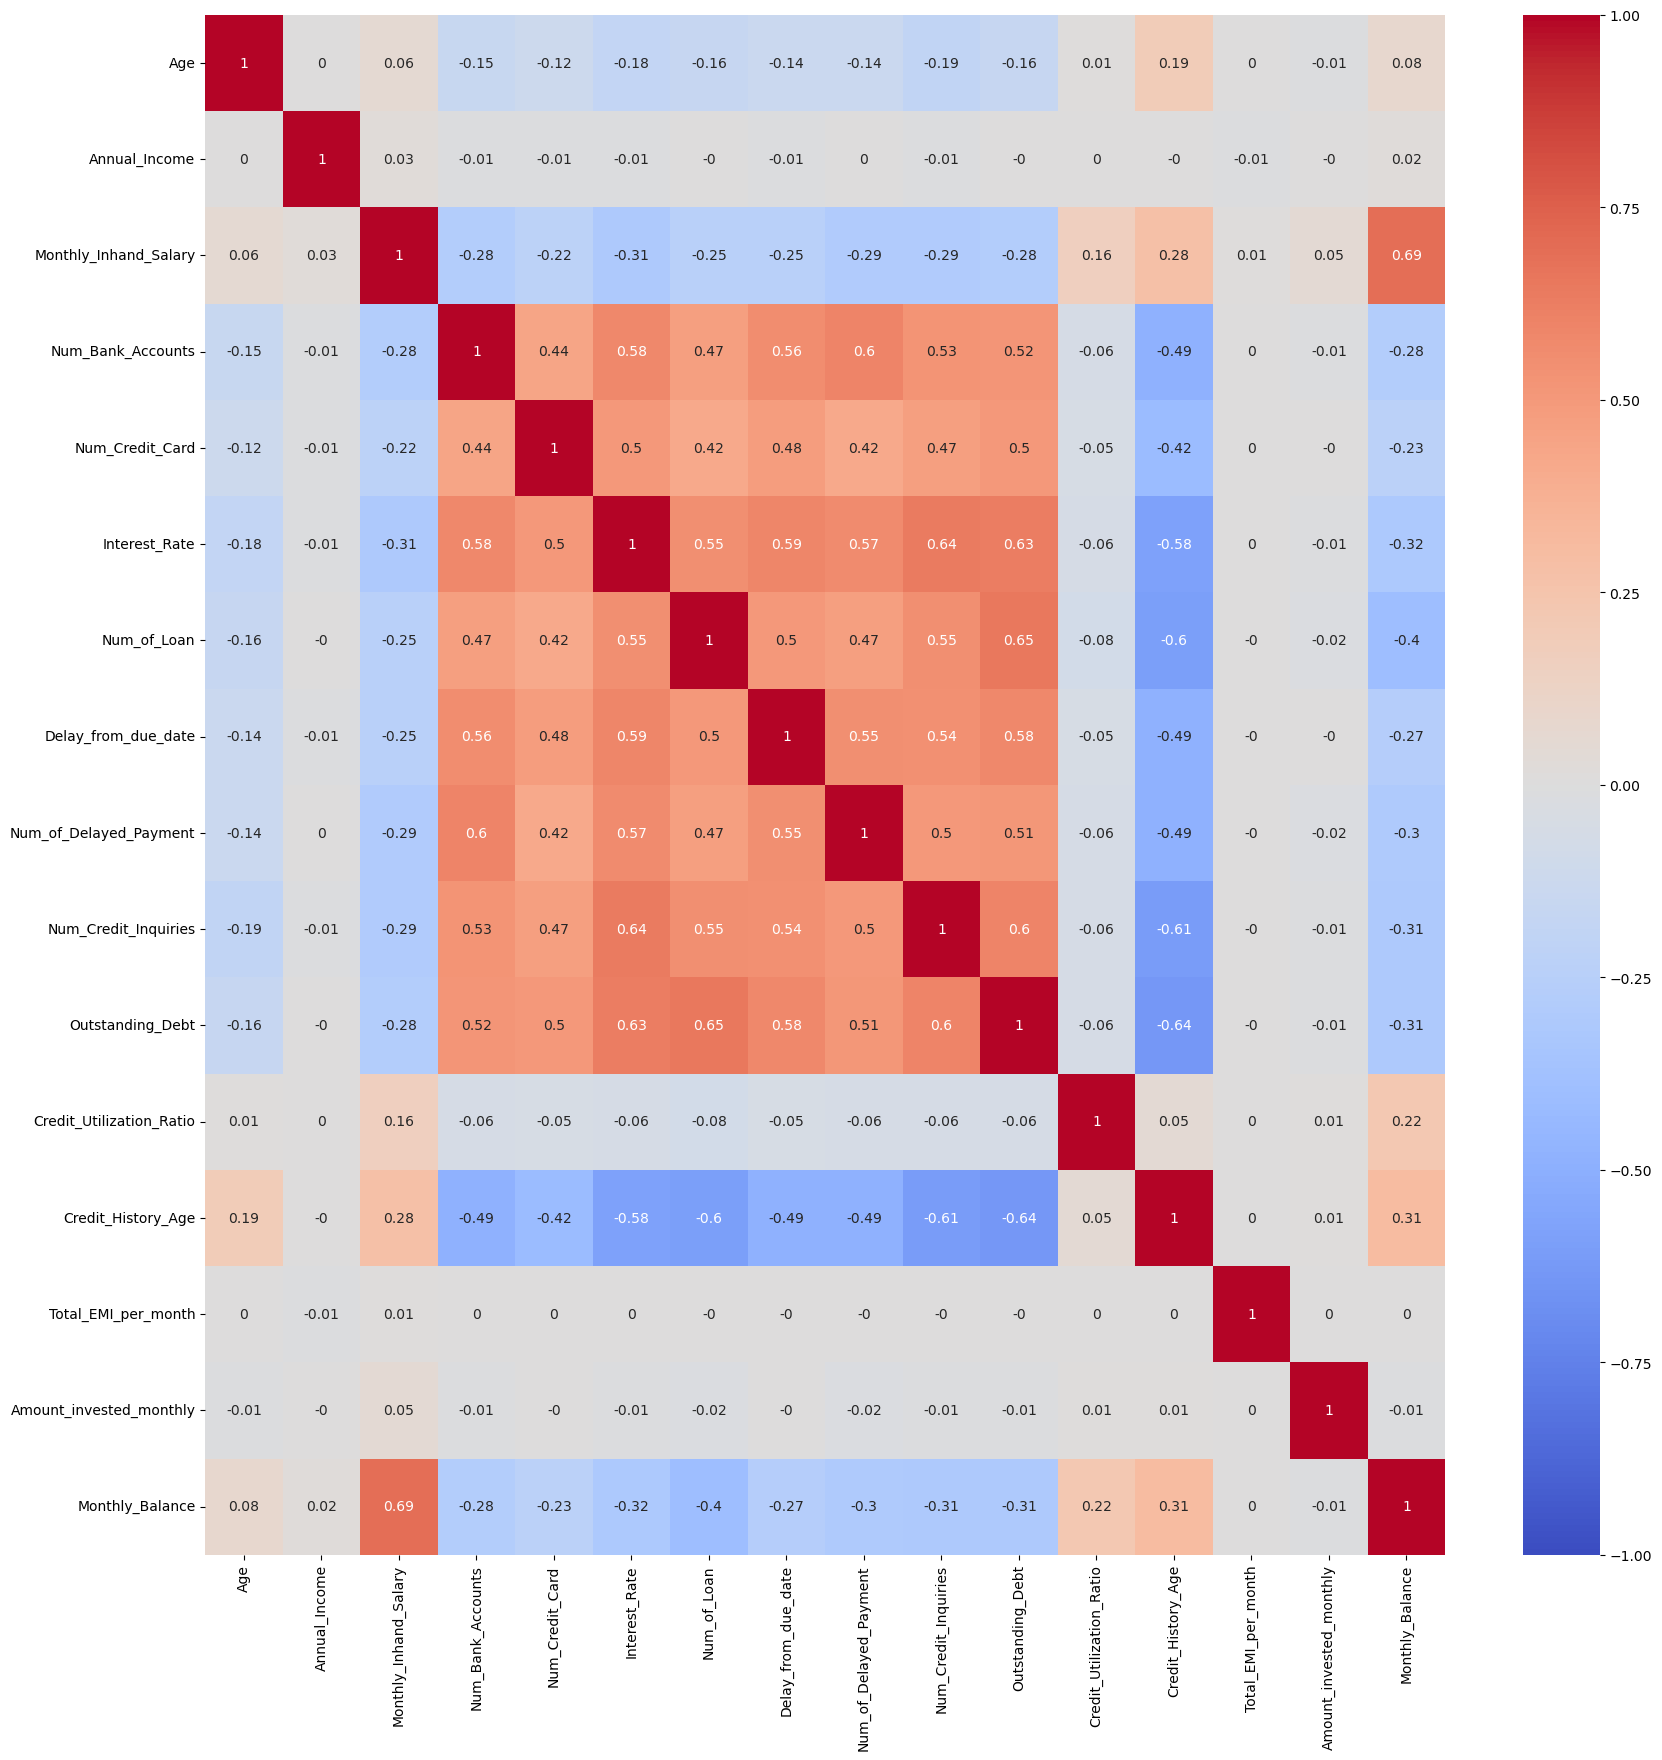

In [74]:
numeric_corr = numerical_data.corr().round(decimals=2)
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

potential columns to reject because of big correlations:
- "monthly_payment", 
- "tot_num_credit_lines"
- "paym_rec_for_tot_amnt_fund" or "princ_rec"

### VIF (Variance Inflation Factor) analysis to determine linearity degree between independent variables

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

"""creating linear models for every independent variable between other independent variables"""
def VIF(numerical_data):    
     X = numerical_data
     X = add_constant(X)

     VIFs = pd.Series(
          [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns
     )
     return VIFs

print(VIF(numerical_data))

const                      100.31
Age                          1.05
Annual_Income                1.00
Monthly_Inhand_Salary        2.00
Num_Bank_Accounts            1.98
Num_Credit_Card              1.54
Interest_Rate                2.43
Num_of_Loan                  2.17
Delay_from_due_date          2.00
Num_of_Delayed_Payment       1.91
Num_Credit_Inquiries         2.19
Outstanding_Debt             2.51
Credit_Utilization_Ratio     1.05
Credit_History_Age           2.15
Total_EMI_per_month          1.00
Amount_invested_monthly      1.01
Monthly_Balance              2.18
dtype: float64


All of the numerical variables can be used for further analysis because of low VIF values

In [76]:
customer_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,July,23,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Persol Loan, a...",3,8.00,4.00,Good,809.98,22.54,22.58,No,49.57,178.34,LowspentSmallvaluepayments,244.57,Good
1,February,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,7,1.00,2.00,Good,605.03,38.55,26.67,No,18.82,40.39,HighspentLargevaluepayments,484.59,Good
2,May,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,1.00,2.00,Good,605.03,34.98,26.92,No,18.82,130.12,LowspentSmallvaluepayments,444.87,Good
3,June,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,0.00,2.00,Good,605.03,33.38,27.00,No,18.82,43.48,HighspentLargevaluepayments,481.51,Good
4,August,28,Teacher,34847.84,3037.99,2,4,6,1,Credit-Builder Loan,3,4.00,2.00,Good,605.03,32.93,27.17,No,18.82,218.90,LowspentSmallvaluepayments,356.08,Good


In [77]:
categorical_data.describe()

,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,31329,31329,31329,31329,31329,31329,31329
unique,8,15,5646,3,3,6,3
top,July,Lawyer,Not Specified,Standard,Yes,LowspentSmallvaluepayments,Standard
freq,3965,2294,528,14358,16977,8601,16577


In [78]:
customer_data = customer_data.drop(columns=['Type_of_Loan'])
customer_data.select_dtypes('object').describe()

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,31329,31329,31329,31329,31329,31329
unique,8,15,3,3,6,3
top,July,Lawyer,Standard,Yes,LowspentSmallvaluepayments,Standard
freq,3965,2294,14358,16977,8601,16577


Categorical values encoding using OneHotEncoder, but for the target variable (Credit_Score) encode manually with 0, 1, 2 cause there are 3 unique
categories

In [79]:
from sklearn.preprocessing import OneHotEncoder

def encode_categoric_data(df):
    """Encodes categorical columns in the DataFrame using OneHotEncoder."""
    categorical_columns = df.loc[:, df.dtypes == 'object'].columns
    encoding_values = df[categorical_columns].nunique().values
    ohe = OneHotEncoder(sparse_output=False) 
    
    # Fit and transform the categorical columns
    one_hot_encoded = ohe.fit_transform(df[categorical_columns])
    one_hot_df = pd.DataFrame(one_hot_encoded, 
                              index=df.index,
                              columns=ohe.get_feature_names_out(categorical_columns)).astype('int32')
    
    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    df_encoded = pd.concat([df, one_hot_df], axis=1)
    df_encoded = df_encoded.drop(categorical_columns, axis=1)
    
    for i, (cat_col, encoded_vals) in enumerate(zip(categorical_columns, encoding_values)):
        print(f"{i+1}) {cat_col} - encoded {encoded_vals} categories")
    
    return df_encoded

credit_scores_encoded = customer_data['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})
customer_data = encode_categoric_data(customer_data.drop(columns='Credit_Score'))
customer_data['Credit_Score'] = credit_scores_encoded
customer_data.head()

1) Month - encoded 8 categories
2) Occupation - encoded 15 categories
3) Credit_Mix - encoded 3 categories
4) Payment_of_Min_Amount - encoded 3 categories
5) Payment_Behaviour - encoded 6 categories


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_April,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Jourlist,Occupation_Lawyer,Occupation_Mager,Occupation_Mechanic,Occupation_MediaMager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,23,19114.12,1824.84,3,4,3,4,3,8.00,4.00,809.98,22.54,22.58,49.57,178.34,244.57,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,2
1,28,34847.84,3037.99,2,4,6,1,7,1.00,2.00,605.03,38.55,26.67,18.82,40.39,484.59,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,2
2,28,34847.84,3037.99,2,4,6,1,3,1.00,2.00,605.03,34.98,26.92,18.82,130.12,444.87,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,2
3,28,34847.84,3037.99,2,4,6,1,3,0.00,2.00,605.03,33.38,27.00,18.82,43.48,481.51,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,2
4,28,34847.84,3037.99,2,4,6,1,3,4.00,2.00,605.03,32.93,27.17,18.82,218.90,356.08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,2


In [80]:
categorical_columns = customer_data.loc[:, customer_data.dtypes == 'object'].columns
customer_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_April,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Jourlist,Occupation_Lawyer,Occupation_Mager,Occupation_Mechanic,Occupation_MediaMager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,23,19114.12,1824.84,3,4,3,4,3,8.00,4.00,809.98,22.54,22.58,49.57,178.34,244.57,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,2
1,28,34847.84,3037.99,2,4,6,1,7,1.00,2.00,605.03,38.55,26.67,18.82,40.39,484.59,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,2
2,28,34847.84,3037.99,2,4,6,1,3,1.00,2.00,605.03,34.98,26.92,18.82,130.12,444.87,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,2
3,28,34847.84,3037.99,2,4,6,1,3,0.00,2.00,605.03,33.38,27.00,18.82,43.48,481.51,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,2
4,28,34847.84,3037.99,2,4,6,1,3,4.00,2.00,605.03,32.93,27.17,18.82,218.90,356.08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31324,50,37188.10,3097.01,1,4,5,3,5,12.00,3.00,620.64,37.75,30.17,84.21,147.34,368.15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,2
31325,28,20002.88,1929.91,10,8,29,5,35,26.00,9.00,3571.70,22.90,5.67,60.96,43.37,328.66,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
31326,28,20002.88,1929.91,10,8,29,5,33,25.00,9.00,3571.70,39.77,5.75,12112.00,148.28,273.75,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
31327,28,20002.88,1929.91,10,8,29,5,33,25.00,9.00,3571.70,24.71,5.83,60.96,76.28,345.74,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [81]:
customer_data['Credit_Score'].value_counts()

Credit_Score
1    16577
0     9574
2     5178
Name: count, dtype: int64

### Scalling numerical data (MinMax scaling)

In [82]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
cols_to_transform = customer_data.loc[:, :'Monthly_Balance'].columns

"""creating copy of dataframe because for other methods such us Decision Trees there might not be need to scale data"""
customer_data_scaled = customer_data.copy() 
customer_data_scaled[cols_to_transform] = minmax_scaler.fit_transform( customer_data_scaled[cols_to_transform] )
customer_data_scaled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_April,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Jourlist,Occupation_Lawyer,Occupation_Mager,Occupation_Mechanic,Occupation_MediaMager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,0.06,0.00,0.10,0.30,0.30,0.06,0.38,0.11,0.29,0.24,0.16,0.06,0.67,0.00,0.02,0.16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,2
1,0.13,0.00,0.18,0.20,0.30,0.15,0.00,0.17,0.04,0.12,0.12,0.62,0.79,0.00,0.00,0.31,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,2
2,0.13,0.00,0.18,0.20,0.30,0.15,0.00,0.11,0.04,0.12,0.12,0.49,0.80,0.00,0.01,0.29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,2
3,0.13,0.00,0.18,0.20,0.30,0.15,0.00,0.11,0.00,0.12,0.12,0.44,0.80,0.00,0.00,0.31,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,2
4,0.13,0.00,0.18,0.20,0.30,0.15,0.00,0.11,0.14,0.12,0.12,0.42,0.81,0.00,0.02,0.23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,2


### Logistic Regression Model

In [83]:
from sklearn import linear_model

X = customer_data_scaled.drop(columns='Credit_Score')
y = customer_data_scaled['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68, stratify=customer_data['Credit_Score'])
log_regression_model = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')

log_regression_model.fit(X_train, y_train)
y_train_probs = log_regression_model.predict_proba(X_train)
y_probs = log_regression_model.predict_proba(X_test)

(y_train_probs, y_probs)

(array([[0.07511648, 0.12735612, 0.7975274 ],
        [0.69885182, 0.28602308, 0.0151251 ],
        [0.80238403, 0.16979447, 0.02782151],
        ...,
        [0.4075555 , 0.53555631, 0.05688819],
        [0.20488237, 0.73655724, 0.05856038],
        [0.06649584, 0.13847978, 0.79502438]]),
 array([[0.14927507, 0.18275803, 0.6679669 ],
        [0.04204284, 0.12085388, 0.83710327],
        [0.21709303, 0.22854647, 0.55436051],
        ...,
        [0.07715594, 0.2221701 , 0.70067396],
        [0.0914366 , 0.80406455, 0.10449885],
        [0.68798293, 0.24387139, 0.06814568]]))

In [84]:
y_train_pred = log_regression_model.predict(X_train)
y_pred = log_regression_model.predict(X_test)
(y_train_pred, y_pred)

(array([2, 0, 0, ..., 1, 1, 2], dtype=int64),
 array([2, 2, 2, ..., 2, 1, 0], dtype=int64))

### Confusion Matrices

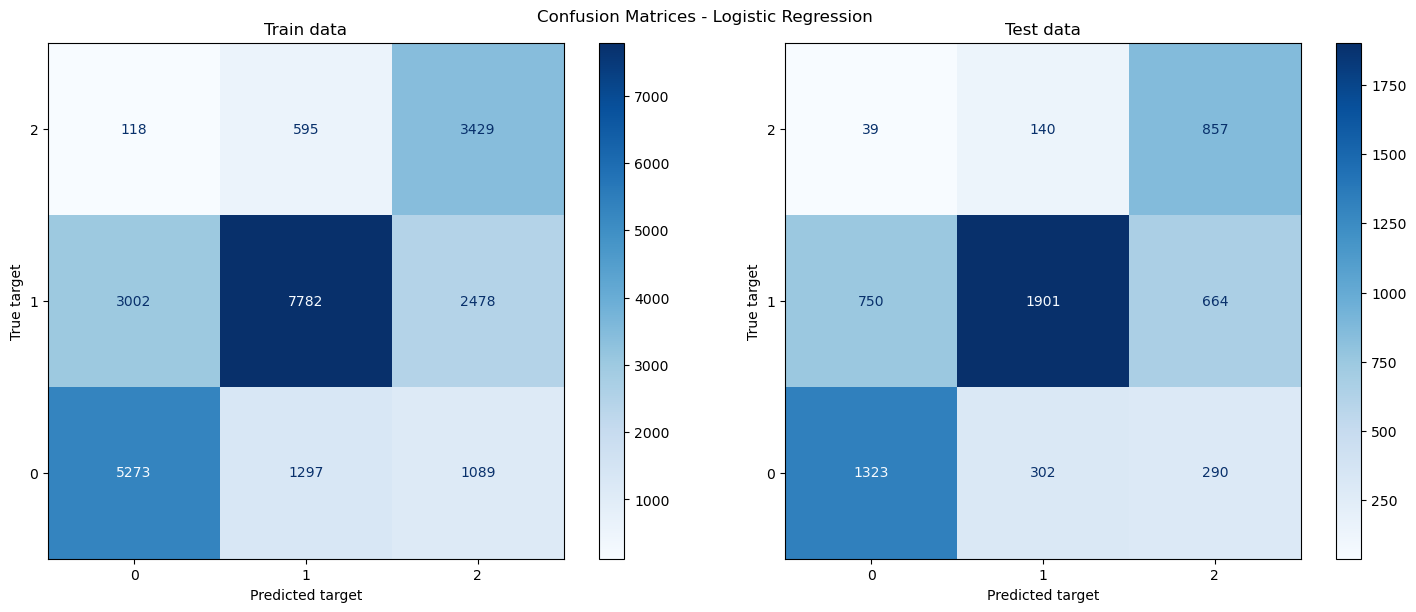

Train data:
Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      7659
           1       0.80      0.59      0.68     13262
           2       0.49      0.83      0.62      4142

    accuracy                           0.66     25063
   macro avg       0.64      0.70      0.65     25063
weighted avg       0.70      0.66      0.66     25063


Test data:
Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1915
           1       0.81      0.57      0.67      3315
           2       0.47      0.83      0.60      1036

    accuracy                           0.65      6266
   macro avg       0.64      0.70      0.64      6266
weighted avg       0.70      0.65      0.66      6266



In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, \
    f1_score, precision_recall_curve, classification_report, PrecisionRecallDisplay

def display_confusion_matrix(y_train, y_train_pred, y_test, y_pred, title='', cmap='cividis'):
    cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=[0, 1, 2])
    cm_test = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1, 2])

    cm_train_disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1, 2])
    cm_test_disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1, 2])
    cms_disp = [cm_train_disp, cm_test_disp]

    fig, axes = plt.subplots(1, 2, figsize=(15, 6)); axes = axes.flatten();
    for i, (ax, cm) in enumerate(zip(axes, cms_disp)):
        cm.plot(ax=ax, cmap=cmap)
        cm_title = 'Train data' if i == 0 else 'Test data'
        ax.set_xlabel('Predicted target')
        ax.set_ylabel('True target')
        ax.set_title(cm_title)
        ax.invert_yaxis() # Invert y-axis for better readability
    fig.suptitle(t=title)
    plt.tight_layout()
    plt.show()
    return cm_train, cm_test

"""Quality metrics for classification model for multiclass classification"""
def display_quality_metrics(y_true, y_pred, y_probs, label='Test data', classes=3, pr_curve_title=''):
    print(f"{label}:")
    print(f"Accuracy: {accuracy_score(y_true=y_true, y_pred=y_pred):.2f}")
    """For multiclass classification, precision, recall and F1-score are calculated for each class"""
    print(classification_report(y_true=y_true, y_pred=y_pred, target_names=[str(i) for i in range(classes)]))
    # precisions = precision_score(y_true=y_true, y_pred=y_pred, average=None)
    # recalls = recall_score(y_true=y_true, y_pred=y_pred, average=None)
    # f1_scores = f1_score(y_true=y_true, y_pred=y_pred, average=None)
    # for c, (p, r, f1_s) in enumerate( zip(precisions, recalls, f1_scores) ):
    #     print(f"\nClass {c}:")
    #     print(f"Precision = {p:.2f}")
    #     print(f"Recall score = {r:.2f}")
    #     print(f"F1-score = {f1_s:.2f}")
    # precisions, recalls, _ = precision_recall_curve(y_true=y_true, probas_pred=y_probs[:, 1])
    # pr_curve_disp = PrecisionRecallDisplay(precision=precisions, recall=recalls, average_precision=True)
    # pr_curve_disp.plot()
    # plt.title(pr_curve_title)
    # plt.legend()
    # plt.show()

cm_train_LR, cm_test_LR = display_confusion_matrix(y_train=y_train, 
                                                   y_train_pred=y_train_pred, 
                                                   y_test=y_test,
                                                   y_pred=y_pred, 
                                                   title='Confusion Matrices - Logistic Regression', 
                                                   cmap='Blues')
display_quality_metrics(y_true=y_train, 
                        y_pred=y_train_pred, 
                        y_probs=y_train_probs, 
                        label='Train data', 
                        pr_curve_title='PR AUC Logistic Regression - Train data')
display_quality_metrics(y_true=y_test, 
                        y_pred=y_pred, 
                        y_probs=y_probs,
                        label='\nTest data',
                        pr_curve_title='PR AUC Logistic Regression - Test data')

### PCA Visualization - Logistic Regression

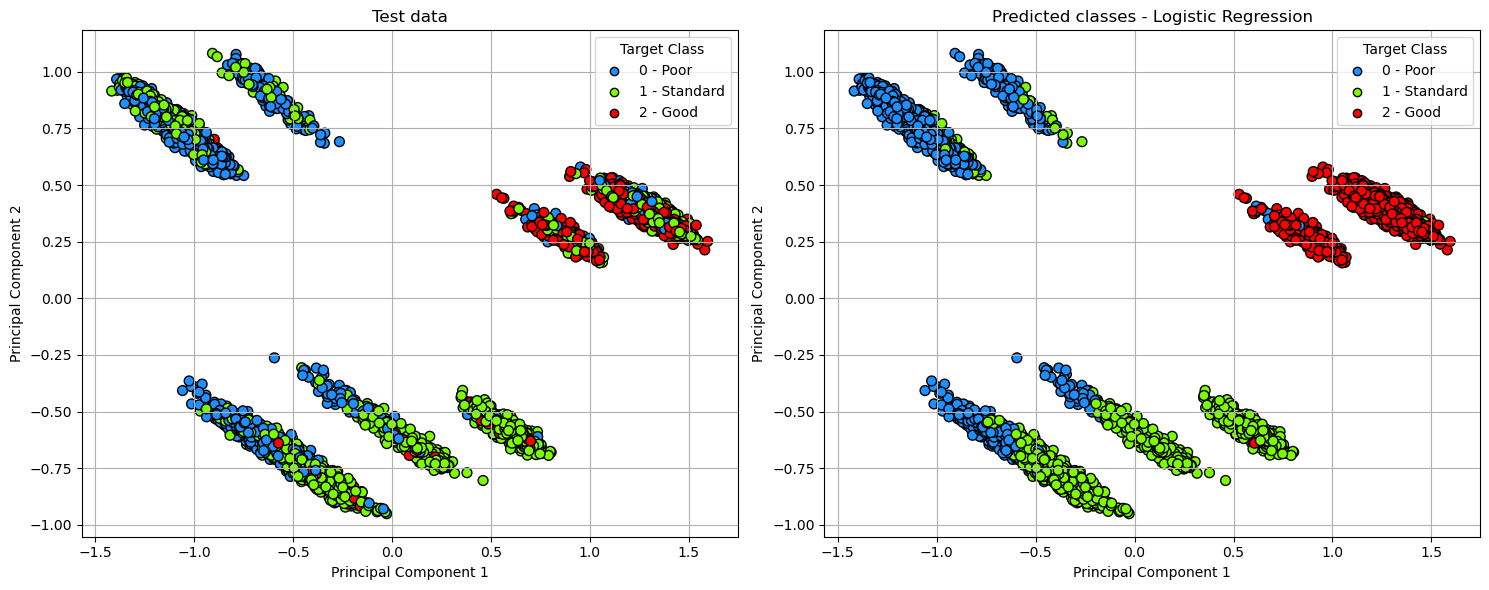

In [86]:
from sklearn.decomposition import PCA

def pca_visualization(X_true, y_true, y_pred, model_name=''):
    """Visualizes PCA components of the training data."""
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_true)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    axes = axes.flatten() 
    colors_dict = {0: 'dodgerblue', 1: 'lawngreen', 2: 'red'} # colors dictionary for classes
    encoded_scoring = {0: 'Poor', 1: 'Standard', 2: 'Good'} # encoded scoring categories for classes
    """Plotting PCA components for true and predicted classes"""
    for i, (ax, y) in enumerate(zip(axes, [y_true, y_pred])):
        colors = [colors_dict[label] for label in y]
        ax.scatter(components[:, 0], components[:, 1], c=colors, edgecolor='k', s=50)
        title = 'Test data' if i == 0 else f'Predicted classes - {model_name}'
        ax.set_title(title)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.grid()
            
        """Legend"""
        for class_value, color in colors_dict.items():
            ax.scatter([], [], c=color, label=f'{class_value} - {encoded_scoring[class_value]}', edgecolor='k')
        ax.legend(title='Target Class')
    plt.tight_layout()
    plt.show()

pca_visualization(X_test, y_test, y_pred, model_name='Logistic Regression')

In [87]:
import torch
"""setting device"""
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### XGBoost algorithm

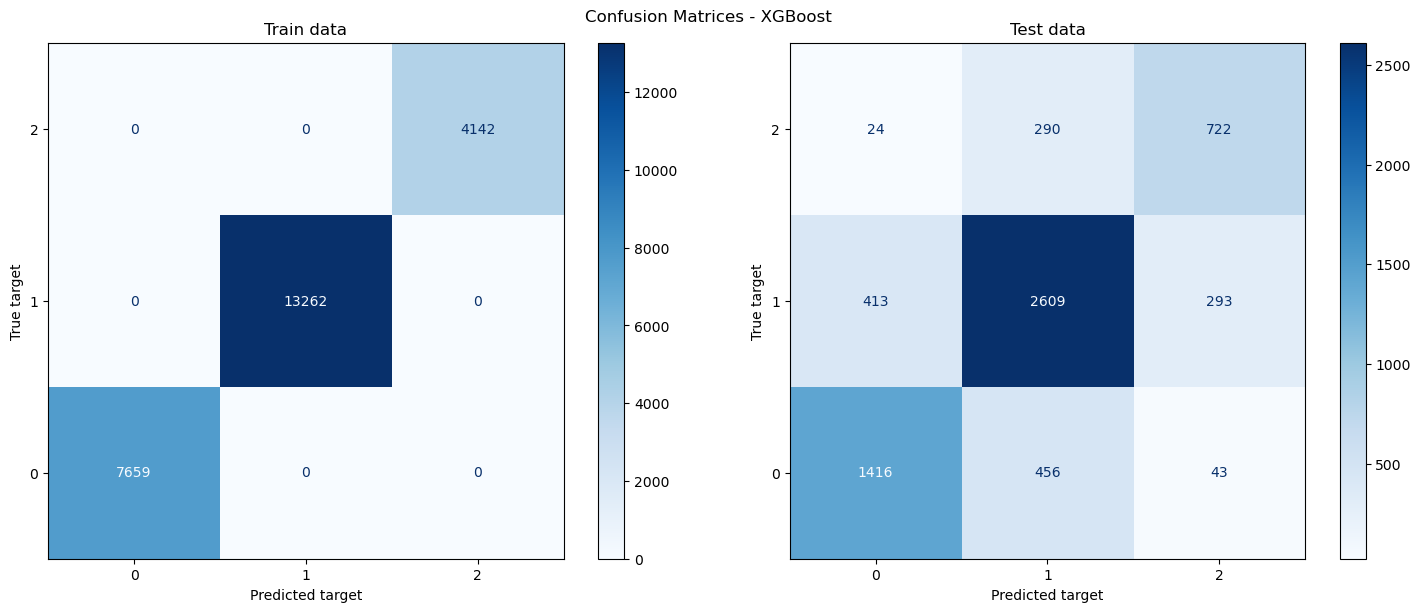

Train data:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7659
           1       1.00      1.00      1.00     13262
           2       1.00      1.00      1.00      4142

    accuracy                           1.00     25063
   macro avg       1.00      1.00      1.00     25063
weighted avg       1.00      1.00      1.00     25063


Test data:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1915
           1       0.78      0.79      0.78      3315
           2       0.68      0.70      0.69      1036

    accuracy                           0.76      6266
   macro avg       0.74      0.74      0.74      6266
weighted avg       0.76      0.76      0.76      6266



In [ ]:
import xgboost as xgb

# Prepare data for XGBoost
X = customer_data_scaled.drop(columns='Credit_Score')
y = customer_data_scaled['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68, stratify=customer_data['Credit_Score'])

xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    device=device
)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

xgb_model.fit(X_train, y_train)
y_pred_XGB_train = xgb_model.predict(X_train)
y_pred_XGB_test = xgb_model.predict(X_test)

cm_train_XGB, cm_test_XGB = display_confusion_matrix(y_train=y_train, 
                                                     y_train_pred=y_pred_XGB_train,
                                                     y_test=y_test, 
                                                     title='Confusion Matrices - XGBoost', 
                                                     y_pred=y_pred_XGB_test, cmap="Blues")
display_quality_metrics(y_true=y_train,
                        y_pred=y_pred_XGB_train,
                        y_probs=xgb_model.predict_proba(X_train),
                        label='Train data',
                        pr_curve_title='PR AUC XGBoost - Train data')
display_quality_metrics(y_true=y_test,
                        y_pred=y_pred_XGB_test,
                        y_probs=xgb_model.predict_proba(X_test),
                        label='\nTest data',            
                        pr_curve_title='PR AUC XGBoost - Test data')

### PCA Visualization - XGBoost 

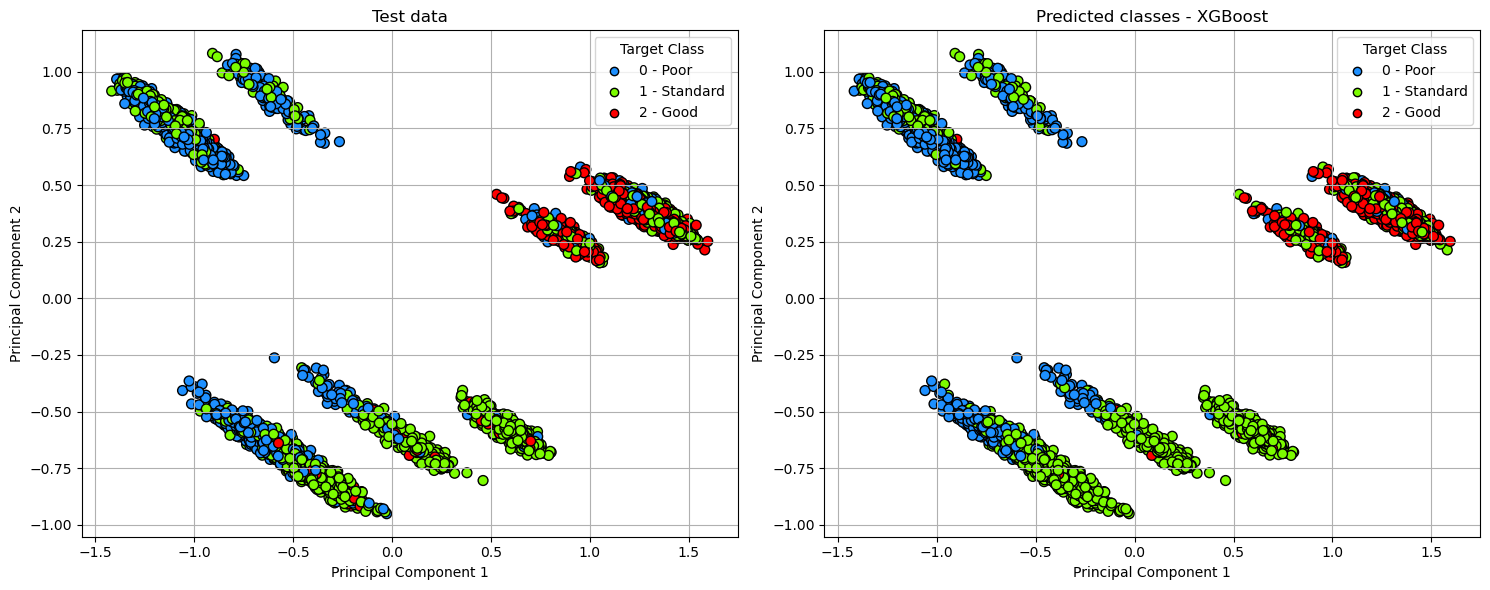

In [89]:
pca_visualization(X_test, y_test, y_pred_XGB_test, model_name='XGBoost')

### Random Forest Classifier

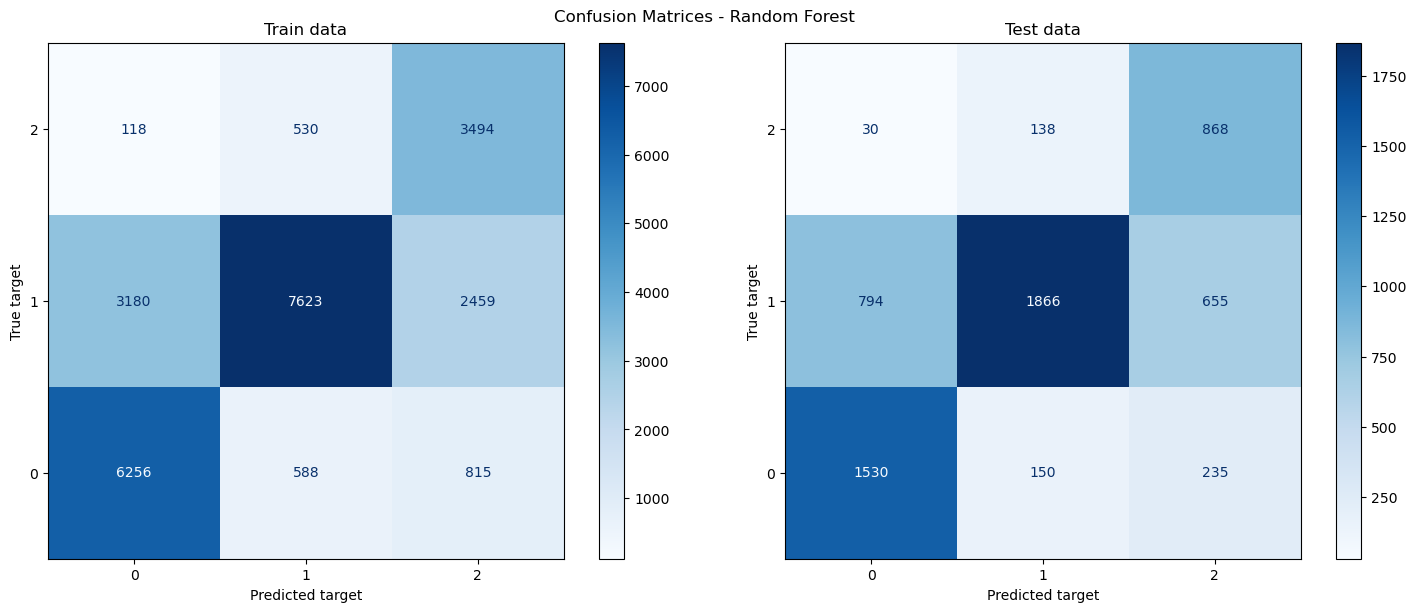

Train data:
Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.65      0.82      0.73      7659
           1       0.87      0.57      0.69     13262
           2       0.52      0.84      0.64      4142

    accuracy                           0.69     25063
   macro avg       0.68      0.75      0.69     25063
weighted avg       0.75      0.69      0.69     25063


Test data:
Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      1915
           1       0.87      0.56      0.68      3315
           2       0.49      0.84      0.62      1036

    accuracy                           0.68      6266
   macro avg       0.67      0.73      0.67      6266
weighted avg       0.74      0.68      0.68      6266



In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=10,
    class_weight='balanced_subsample',
    random_state=68,
    n_jobs=4
)

rf_model.fit(X_train, y_train)
y_pred_RF_train = rf_model.predict(X_train) 
y_pred_RF_test = rf_model.predict(X_test)

cm_train_RF, cm_test_RF = display_confusion_matrix(y_train=y_train, 
                                                   y_train_pred=y_pred_RF_train,
                                                   y_test=y_test, 
                                                   title='Confusion Matrices - Random Forest', 
                                                   y_pred=y_pred_RF_test, cmap="Blues")  
display_quality_metrics(y_true=y_train,
                        y_pred=y_pred_RF_train,
                        y_probs=rf_model.predict_proba(X_train),
                        label='Train data',
                        pr_curve_title='PR AUC Random Forest - Train data')
display_quality_metrics(y_true=y_test,  
                        y_pred=y_pred_RF_test,
                        y_probs=rf_model.predict_proba(X_test),
                        label='\nTest data',
                        pr_curve_title='PR AUC Random Forest - Test data')

### PCA Visualization - Random Forest

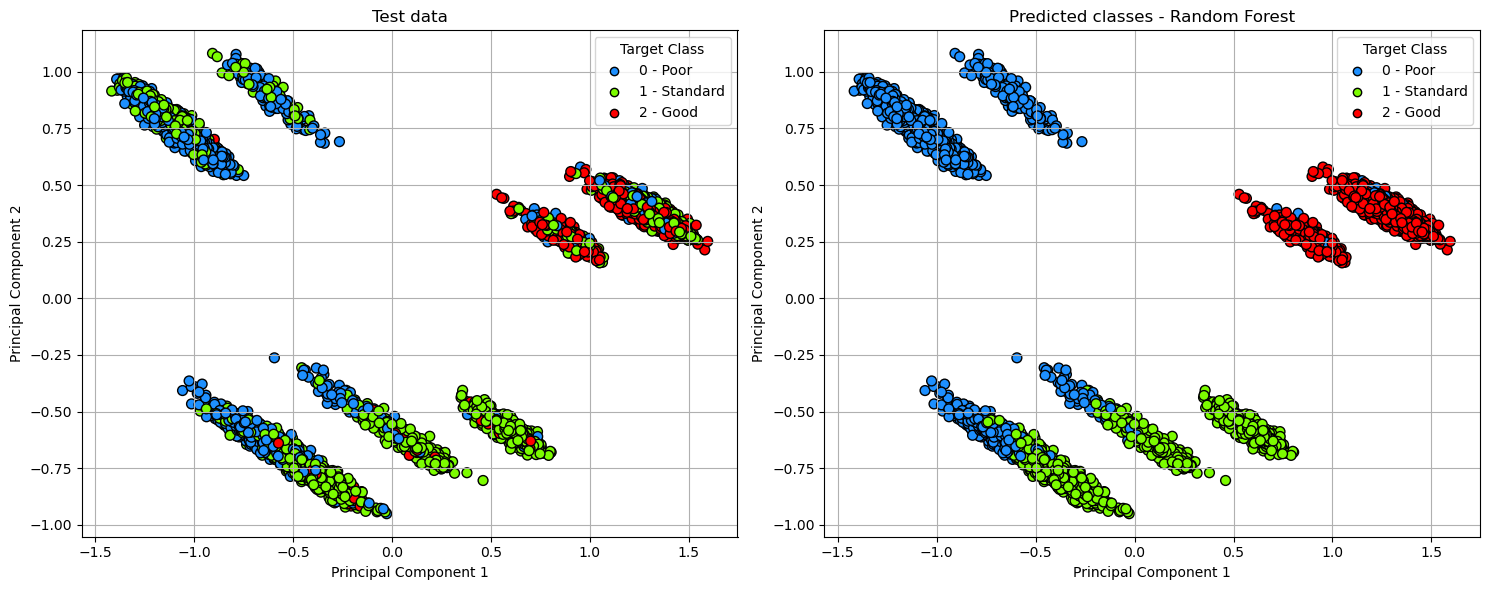

In [91]:
pca_visualization(X_test, y_test, y_pred_RF_test, model_name='Random Forest')

In [92]:
gloabl_end_time = time.time()
print(f"Total execution time: {gloabl_end_time - gloabl_start_time:.2f} seconds")

Total execution time: 80.03 seconds
